In [5]:
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from path import Path
import xml.etree.ElementTree as ET

images=Path(r'D:\nn\code\datasets\fire\fire\satellite\JPEGImages')
annos=Path(r'D:\nn\code\datasets\fire\fire\satellite\Annotations')
masks=Path(r'D:\nn\code\datasets\fire\satellite\Segments')
classes=['fire',]

In [6]:

def convert_annotation(in_file):
    tree=ET.parse(in_file)
    root = tree.getroot()
    res=[]
    # width=int(root.find('size').find('width').text)
    # height=int(root.find('size').find('height').text)
    # res.append(width)
    # res.append(height)
    for obj in root.iter('object'):
        difficult = 0 
        if obj.find('difficult')!=None:
            difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = ((float(xmlbox.find('xmin').text)), (float(xmlbox.find('ymin').text)), (float(xmlbox.find('xmax').text)), (float(xmlbox.find('ymax').text)))
        res.append([*b,cls_id,cls])
    return res


In [7]:
impath=images/'A2023001_h20v08.jpg'
bbox=convert_annotation(annos/f'{impath.stem}.xml')
im=plt.imread(impath)
# print(bbox)
ax=plt.subplot(1,1,1)

for box in bbox:
    rect = patch.Rectangle((box[0], box[1]),box[2]-box[0],box[3]-box[1],edgecolor = 'r', linewidth = 3,fill = False)
    ax.add_patch(rect)
# ax.set_title(impath.name)
plt.axis('off')
ax.imshow(im)


FileNotFoundError: [Errno 2] No such file or directory: Path('D:\\nn\\code\\datasets\\fire\\fire\\satellite\\Annotations\\A2023001_h20v08.xml')

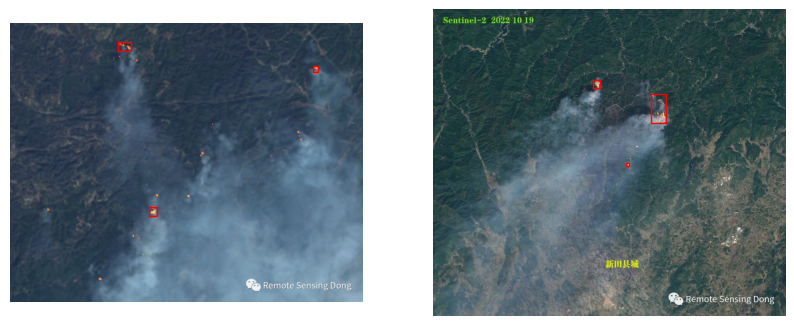

In [14]:

plt.figure(figsize=(10,20))
res= [i  for i in images.files() if not i.stem.startswith('a')]
for i,impath in enumerate(res[5:7]):
    bbox=convert_annotation(annos/f'{impath.stem}.xml')
        
    im=plt.imread(impath)
    ax=plt.subplot(1,2,i+1)

    for box in bbox:
        rect = patch.Rectangle((box[0], box[1]),
                            (box[2]-box[0]),(box[3]-box[1]),
                            edgecolor = 'r', linewidth = 1,fill = False)
        # ax.text(box[0],box[1],'fire',color='r')
        ax.add_patch(rect)
    # ax.set_title(impath.name)
    plt.axis('off')
    ax.imshow(im)
        
        